# Desafio

## Questão 1
- Código carrega um arquivo CSV
- Remove as duplicatas
- Salva as alterações de volta no mesmo arquivo CSV, sem incluir o índice das linhas.


In [112]:
import pandas as pd
import matplotlib.pyplot as plt


arquivo = "/content/googleplaystore.csv"
df = pd.read_csv(arquivo)

df = df.drop_duplicates()

df.to_csv(arquivo, index=False)


## Questão 2

- No início foca em deixar os dados em um padrão
- Seleciona os top 5
- Cria lista e adiciona os valores a ela


In [113]:
df['Installs'] = df['Installs'].replace('Free', '0')
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',','')
df['Installs'] = df['Installs'].astype(int)

top5 = df.nlargest(5, 'Installs')[['App','Installs']]

nomes_aplicativos = top5['App'].tolist()
numero_instalacoes = top5['Installs'].tolist()

numeros_finais = [f'{i}+' for i in numero_instalacoes]

print(numeros_finais)

app = []
installs = []

for indice, linha in top5.iterrows():
  app.append(linha['App'])
  installs.append(linha['Installs'])

['1000000000+', '1000000000+', '1000000000+', '1000000000+', '1000000000+']


## Questão 2

- Cria o Gráfico de barras


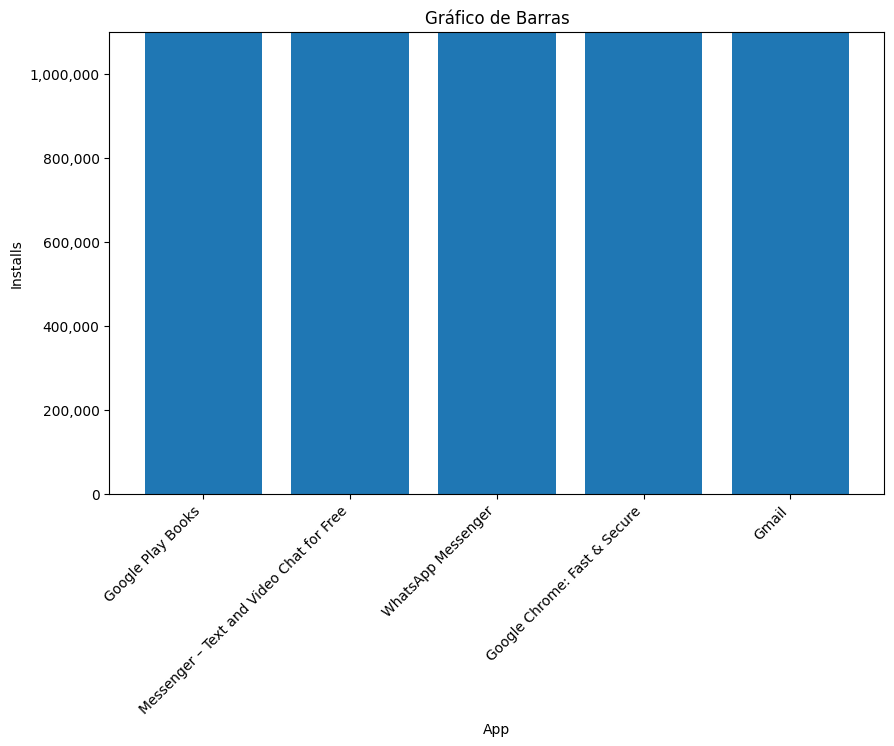

In [114]:
valores_y = [0, 200000, 400000, 600000, 800000, 1000000]

plt.figure(figsize=(10, 6))
plt.bar(app, installs)
plt.xlabel('App')
plt.ylabel('Installs')
plt.title('Gráfico de Barras')

plt.yticks(valores_y, [f'{valor:,}' for valor in valores_y])

plt.ylim(0, max(valores_y) + 100000)

plt.xticks(rotation=45, ha='right')
plt.show()


## Questão 3

- No início foca em deixar os dados em um padrão
- Faz a soma dos valores da coluna "Category" e transforma em porcentagem
- Transforma todos os valores que tem menos de 2% em "Outros" para simplificar o gráfico

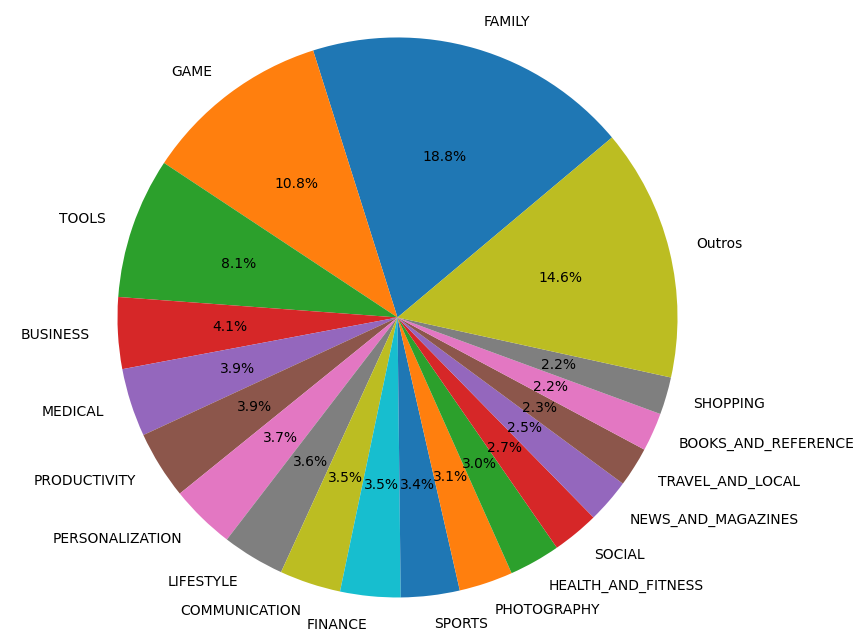

In [115]:
categorias_final = df[df['Category'] != '1.9']['Category']
df['Category'] = categorias_final

contagem = df['Category'].value_counts()

total = contagem.sum()
porcentagens = (contagem / total) * 100

limite = 2
outras = porcentagens[porcentagens < limite]
outras_total = outras.sum()
porcentagens = porcentagens[porcentagens >= limite]
porcentagens['Outros'] = outras_total

plt.figure(figsize=(10, 8))
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.show()

## Questão 4

- No início foca em deixar os dados em um padrão
- Uso o nlargest para pegar o maior valor da coluna "Price"

In [116]:
df = df[df['Price'] != 'Everyone']
df['Price'] = df['Price'].str.replace('$', '').astype(float)
mais_caro = df.nlargest(1,'Price')[['App','Price']]
mais_caro_formatado = [f"${mais_caro['App'].values[0]}: ${mais_caro['Price'].values[0]}"]


print (mais_caro_formatado)

["$I'm Rich - Trump Edition: $400.0"]


<ipython-input-116-67246bbfde0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


## Questão 5

- É feito a soma de todos os valores "Mature 17+" dentro da coluna "Content Rating'

In [ ]:
content_rating = df['Content Rating']
mature17 = (df['Content Rating'] == 'Mature 17+').sum()

print (mature17, "Apps são classificado como Mature 17+")

447 Apps são classificado como Mature 17+


## Questão 6

- No início converte os valores para tipo numérico
- Faço um cálculo agrupado pela coluna "App"
- Uso o nlargest para mostrar os 10 maiores valores por app


In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
apps_unique = df.groupby('App')['Reviews'].max()
top10 = apps_unique.nlargest(10)

print("Top 10 Aplicativos com Maior Número de Avaliações:")
print(top10)

Top 10 Aplicativos com Maior Número de Avaliações:
App
Facebook                                              78158306
WhatsApp Messenger                                    69119316
Instagram                                             66577446
Messenger – Text and Video Chat for Free              56646578
Clash of Clans                                        44893888
Clean Master- Space Cleaner & Antivirus               42916526
Subway Surfers                                        27725352
YouTube                                               25655305
Security Master - Antivirus, VPN, AppLock, Booster    24900999
Clash Royale                                          23136735
Name: Reviews, dtype: int64


## Questão 7

### As 5 categorias com maior média de avaliações em formato de lista

- No início foca em deixar os dados em um padrão
- A média é feita com mean()
- Uso do nlargest para mostrar os 5 maiores médias


In [118]:
print ('As 5 categorias com maior média de avaliações\n')

df['Category'] = df[df['Category'] != '1.9']['Category']
media_rating = df.groupby('Category')['Rating'].mean()
media_rating_formatado = media_rating.nlargest(5)

lista_formatada = list(media_rating_formatado.reset_index().to_records(index=False))

print(lista_formatada)

As 5 categorias com maior média de avaliações

[('EVENTS', 4.43555556), ('EDUCATION', 4.37596899), ('ART_AND_DESIGN', 4.35806452), ('BOOKS_AND_REFERENCE', 4.34745763), ('PERSONALIZATION', 4.33387097)]


## Questão 7

### Preços vs média de avaliações em formato de valor

- No início foca em deixar os dados em um padrão, removendo os campos NaN
- A média é feita com mean()

In [ ]:
df_filtered = df.dropna(subset=['Price', 'Rating'])
rating_price = df_filtered.groupby('Price')['Rating'].mean().reset_index()
print(rating_price.to_string(index=False))

 Price   Rating
  0.00 4.182425
  0.99 4.298095
  1.00 4.450000
  1.20 4.200000
  1.29 4.100000
  1.49 4.196774
  1.50 4.200000
  1.59 4.500000
  1.61 4.200000
  1.70 4.300000
  1.75 5.000000
  1.76 4.500000
  1.97 4.500000
  1.99 4.325424
  2.00 4.400000
  2.49 4.335000
  2.50 4.800000
  2.56 3.400000
  2.59 4.700000
  2.90 4.200000
  2.95 4.500000
  2.99 4.284545
  3.02 4.200000
  3.04 5.000000
  3.08 4.400000
  3.28 3.900000
  3.49 4.328571
  3.88 4.600000
  3.90 4.700000
  3.95 3.800000
  3.99 4.332727
  4.29 4.600000
  4.49 4.400000
  4.59 2.000000
  4.60 3.400000
  4.77 3.800000
  4.84 4.100000
  4.99 4.173529
  5.49 4.500000
  5.99 4.320000
  6.49 3.400000
  6.99 4.291667
  7.49 4.450000
  7.99 4.342857
  8.49 3.700000
  8.99 3.725000
  9.00 4.200000
  9.99 4.192857
 10.00 4.650000
 10.99 3.500000
 11.99 4.366667
 12.99 4.225000
 13.99 4.300000
 14.00 4.600000
 14.99 4.362500
 15.46 3.400000
 15.99 4.700000
 16.99 4.100000
 17.99 3.750000
 18.99 4.600000
 19.40 4.700000
 19.99 4

## Questão 8

### As 5 categorias com maior média de avaliações - Gráfico de linha

- Converte a variável em um dicionário
- Divide em listas para utilizar nos eixos
- Cria o gráfico de linhas com algumas personalizações

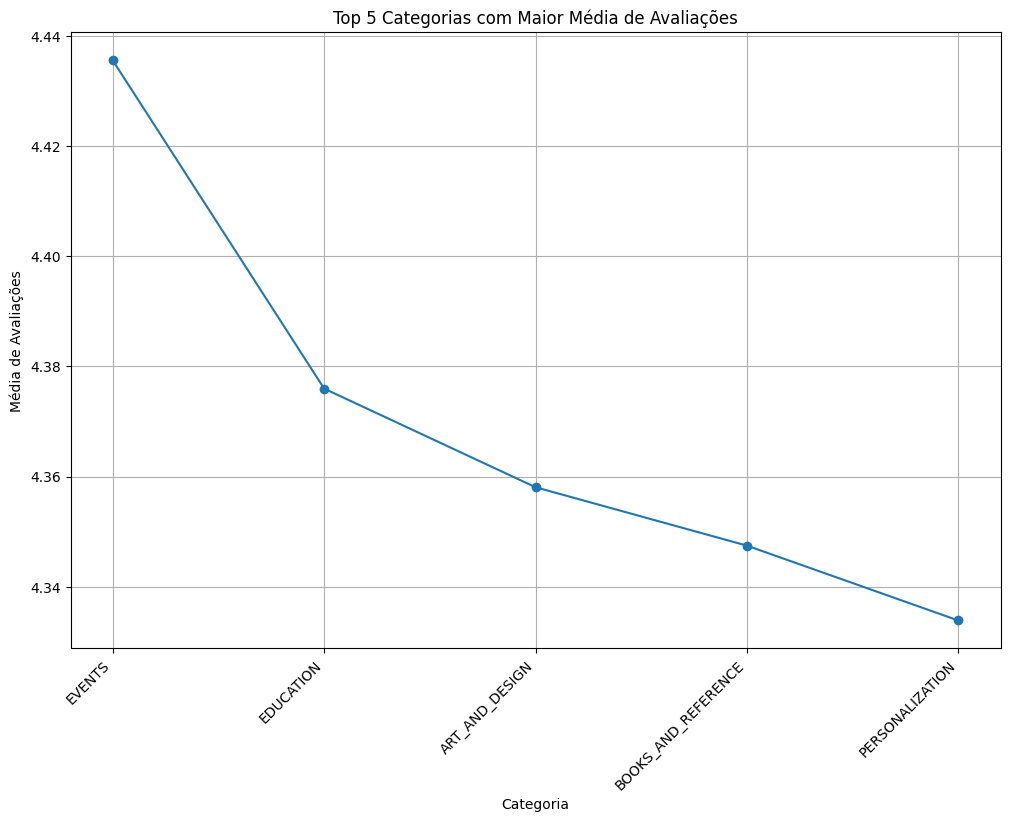

In [ ]:
dados_grafico = media_rating_formatado.to_dict()

categorias = list(dados_grafico.keys())
medias = list(dados_grafico.values())

plt.figure(figsize=(12, 8))
plt.plot(categorias, medias, marker='o', linestyle='-')
plt.xlabel('Categoria')
plt.ylabel('Média de Avaliações')
plt.title('Top 5 Categorias com Maior Média de Avaliações')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Questão 8

### Preços vs média de avaliações em formato - Gráfico de dispersão

- No início foca em deixar os dados em um padrão, removendo os campos NaN
- Cria um gráfico de dispersão

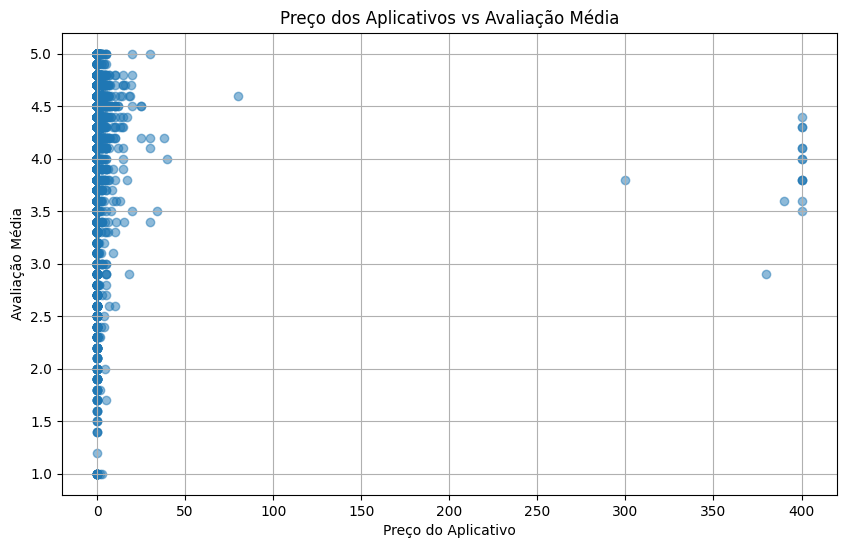

In [ ]:
df_filtered = df.dropna(subset=['Price', 'Rating'])

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Price'], df_filtered['Rating'], alpha=0.5)
plt.title('Preço dos Aplicativos vs Avaliação Média')
plt.xlabel('Preço do Aplicativo')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.show()